# Introduction

The project aims to explore and analyze the top executives of companies worldwide, focusing on their net worth and respective countries. By examining this data, the goal is to gain insights into the wealthiest executives globally and understand the distribution of wealth across different countries.

## Dataset Description

The dataset used for this analysis consists of the following fields:

**RANK**: The ranking of the executive based on their net worth.
    
**COMPANY**: The company associated with the executive
    
**EXECUTIVE NAME**: The name of the executive.
    
**NET WORTH**: The reported net worth of the executive.
    
**COUNTRY**: The country where the executive is based or holds citizenship.

## Task: Identify and Analyze the Top Executives by Net Worth

__Data Source___: The data was collected from Kaggle, a platform known for hosting datasets relevant to various domains.

***Importing required libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
df = pd.read_csv("World_Billionaire_2024.csv")

- head() method used to display the first five rows

In [3]:
df.head()

,RANK,COMPANY,EXECUTIVE NAME,NET WORTH,COUNTRY
0,RANK,COMPANY,EXECUTIVE NAME,NET WORTH,COUNTRY
1,1,"Tesla, SpaceX",Elon Musk,$212.3 B,United States
2,2,Amazon,Jeff Bezos,$203.5 B,United States
3,3,LVMH,Bernard Arnault & family,$194.3 B,France
4,4,Facebook,Mark Zuckerberg,$175.9 B,United States


 - info() method provide concise summary of data


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2743 entries, 0 to 2742
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   RANK            2743 non-null   object
 1   COMPANY         2740 non-null   object
 2   EXECUTIVE NAME  2743 non-null   object
 3   NET WORTH       2743 non-null   object
 4   COUNTRY         2743 non-null   object
dtypes: object(5)
memory usage: 107.3+ KB


 - shape attribute return the number of rows & columns


In [5]:
df.shape

(2743, 5)

 - isnull() mehtod is used to detect missing or null values
 - sum() method is used to sum up value
 - sort_values() method  is used to sort value in ascending or descending order

In [6]:
df.isnull().sum().sort_values()

RANK              0
EXECUTIVE NAME    0
NET WORTH         0
COUNTRY           0
COMPANY           3
dtype: int64

 - removes both the dollar sign ($) and the letter 'B' from in the column of NET WORTH
 - using str.replace() method

In [7]:
df["NET WORTH"] = df["NET WORTH"].str.replace("$","").str.replace("B","", regex=True)

In [8]:
df.head()

,RANK,COMPANY,EXECUTIVE NAME,NET WORTH,COUNTRY
0,RANK,COMPANY,EXECUTIVE NAME,NET WORTH,COUNTRY
1,1,"Tesla, SpaceX",Elon Musk,212.3,United States
2,2,Amazon,Jeff Bezos,203.5,United States
3,3,LVMH,Bernard Arnault & family,194.3,France
4,4,Facebook,Mark Zuckerberg,175.9,United States


 - Using pd.to_numeric:convert a column of data into numeric types
 - Handling Errors with errors="coerce": like NaN values

In [9]:
df["NET WORTH"] = pd.to_numeric(df["NET WORTH"], errors= "coerce")

 - describe() provides descriptive statistics 

In [10]:
df.describe()

,NET WORTH
count,2742.000000
mean,5.248395
std,12.926505
min,0.400000
25%,1.500000
50%,2.400000
75%,4.675000
max,212.300000


 - isnull() - is used to count the number of missing (NaN) values 

In [11]:
df.isnull().sum()

RANK              0
COMPANY           3
EXECUTIVE NAME    0
NET WORTH         1
COUNTRY           0
dtype: int64

 - dropna()  is used to remove missing values.


In [12]:
df = df.dropna()

In [13]:
df.isnull().sum()

RANK              0
COMPANY           0
EXECUTIVE NAME    0
NET WORTH         0
COUNTRY           0
dtype: int64

## Histogram

 - Here we created a histogram of the 'NET WORTH' column, which is highly right-skewed. Most of the data is concentrated towards the lower end of the net worth range, with very few high net worth values.

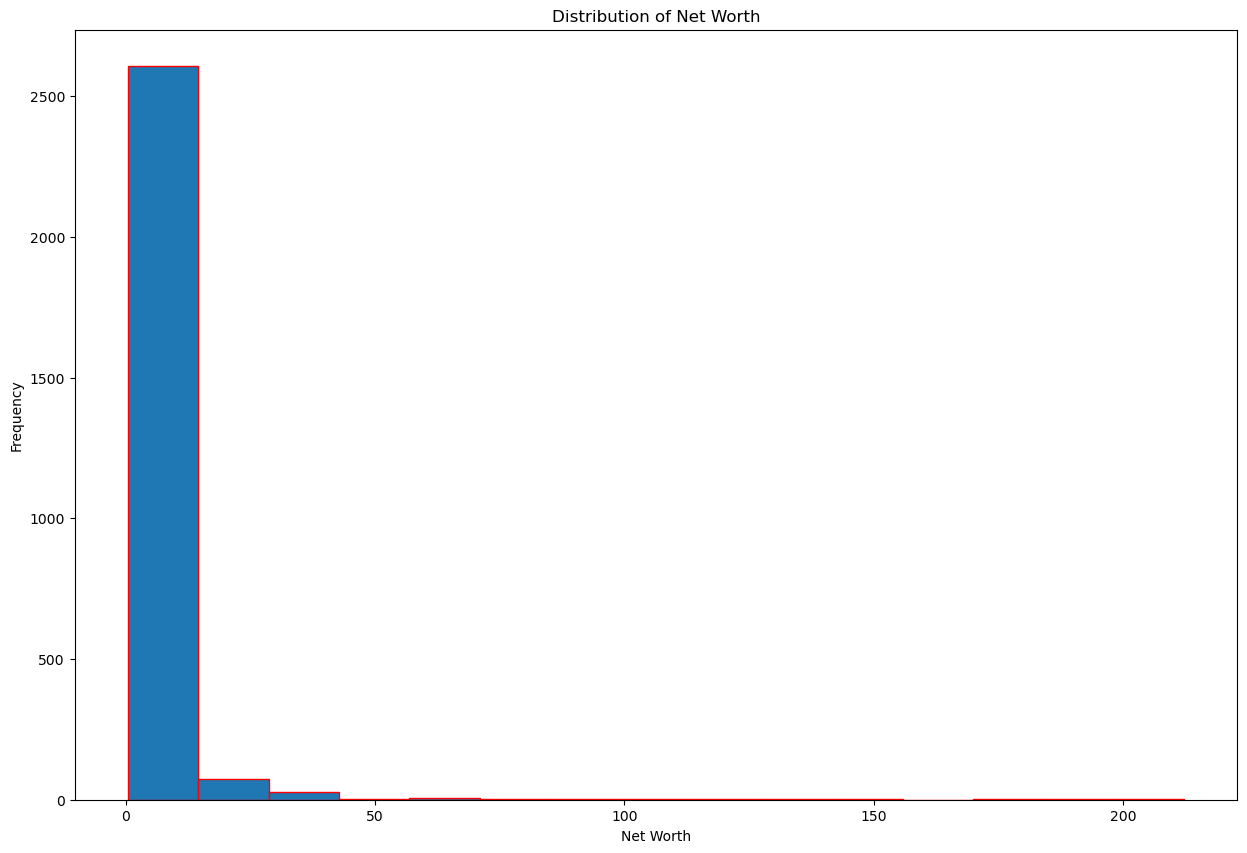

In [14]:
plt.figure(figsize=(15,10))
plt.hist(df['NET WORTH'], bins=15, edgecolor='r')
plt.xlabel('Net Worth')
plt.ylabel('Frequency')
plt.title('Distribution of Net Worth')
plt.show()

## Pie chart

 - "The pie chart shows that the highest number of millionaires reside in the United States and France, which are the top two countries with the most affluent individuals.

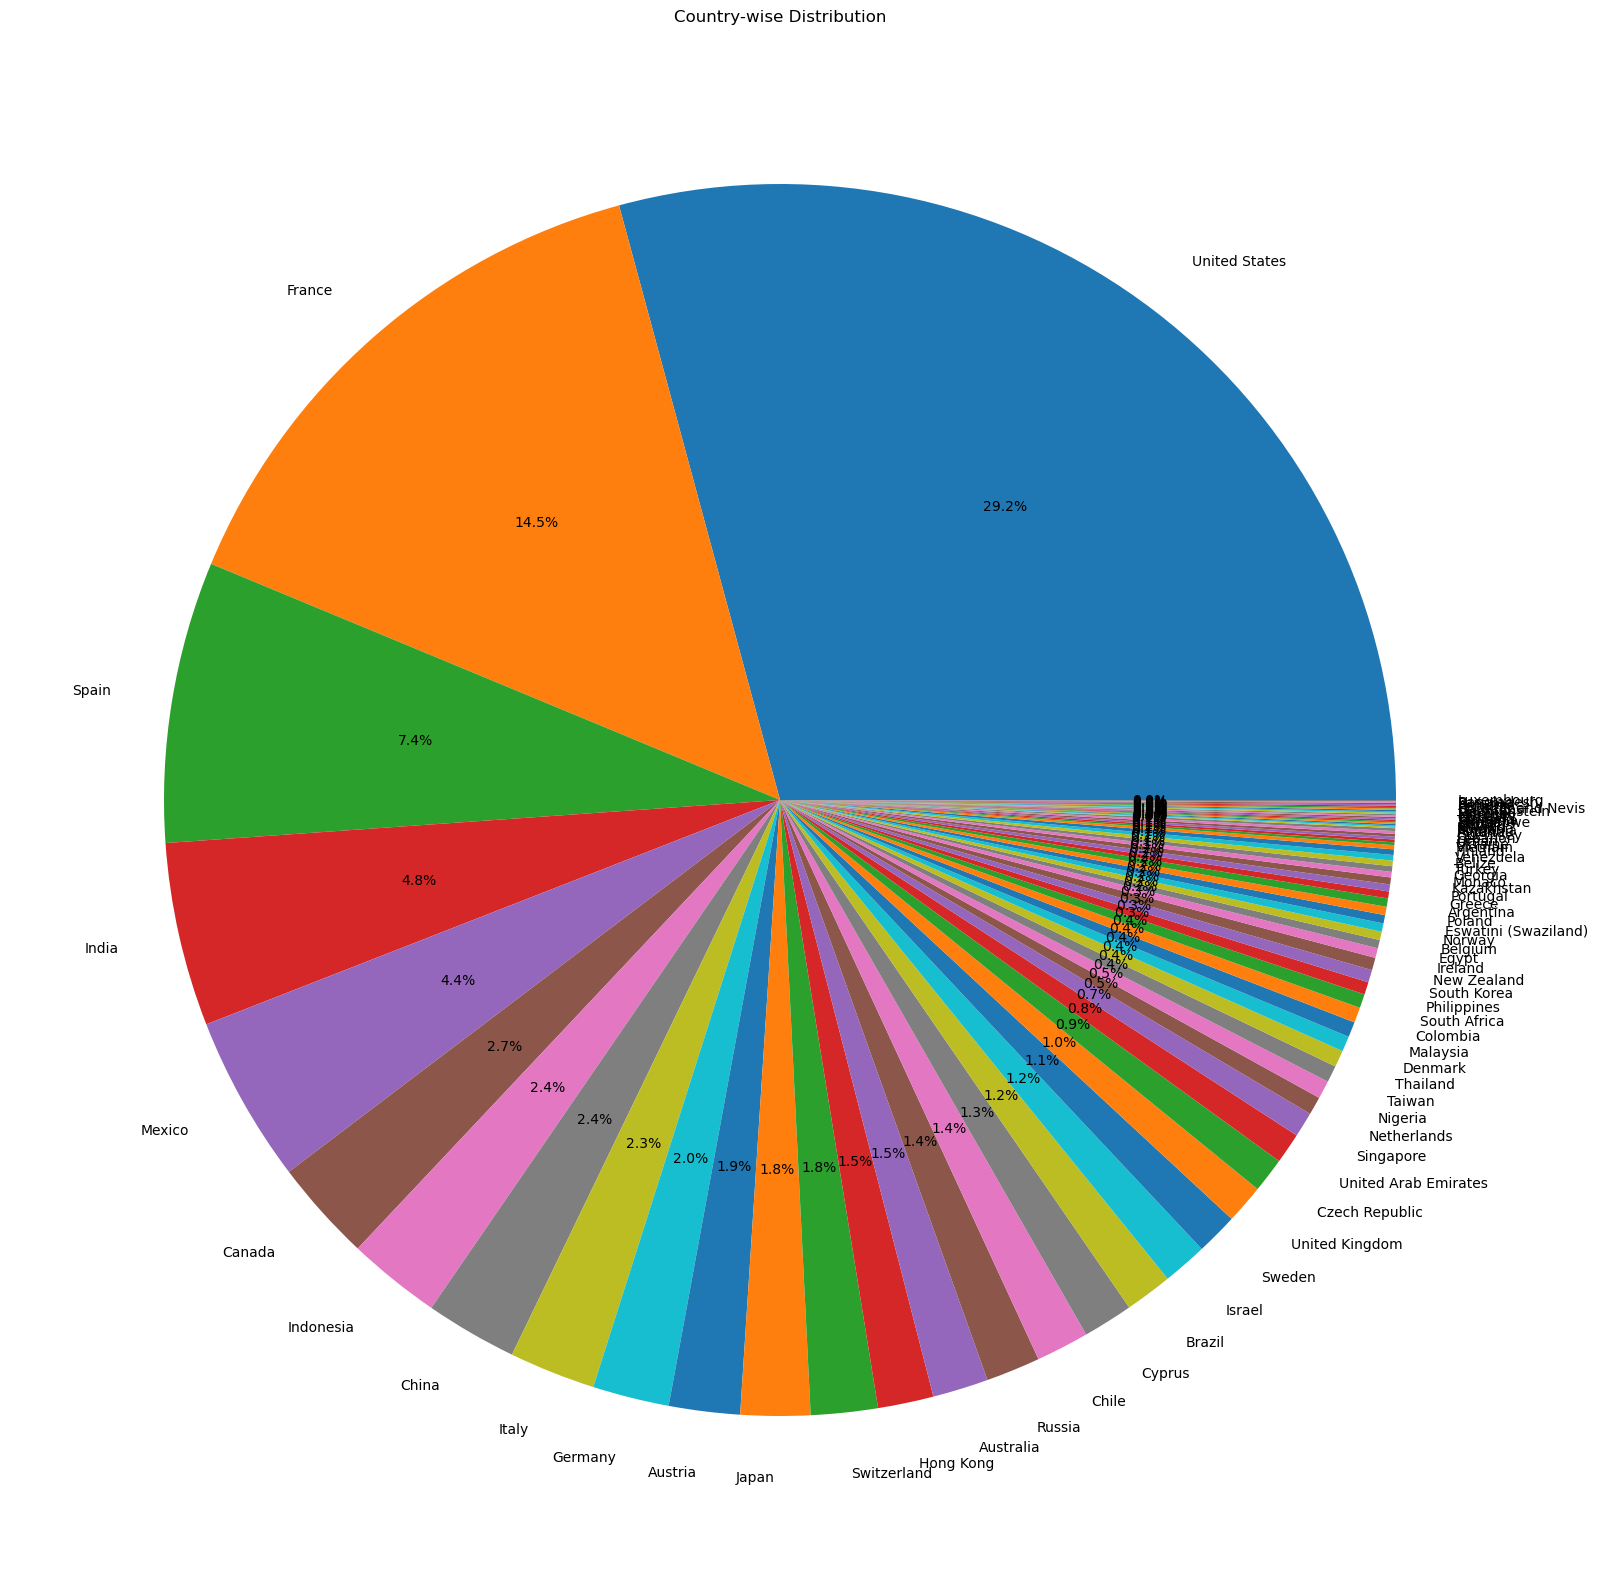

In [15]:
plt.figure(figsize=(20,20))
plt.pie(df["COUNTRY"].value_counts(), labels=df["COUNTRY"].unique(), autopct="%1.1f%%")
plt.title("Country-wise Distribution")
plt.show()

## Bar PLot

 - This bar plot visualizes the net worths of the top 10 richest individuals in 2024. Each bar represents a billionaire's net worth, allowing easy comparison of their wealth.

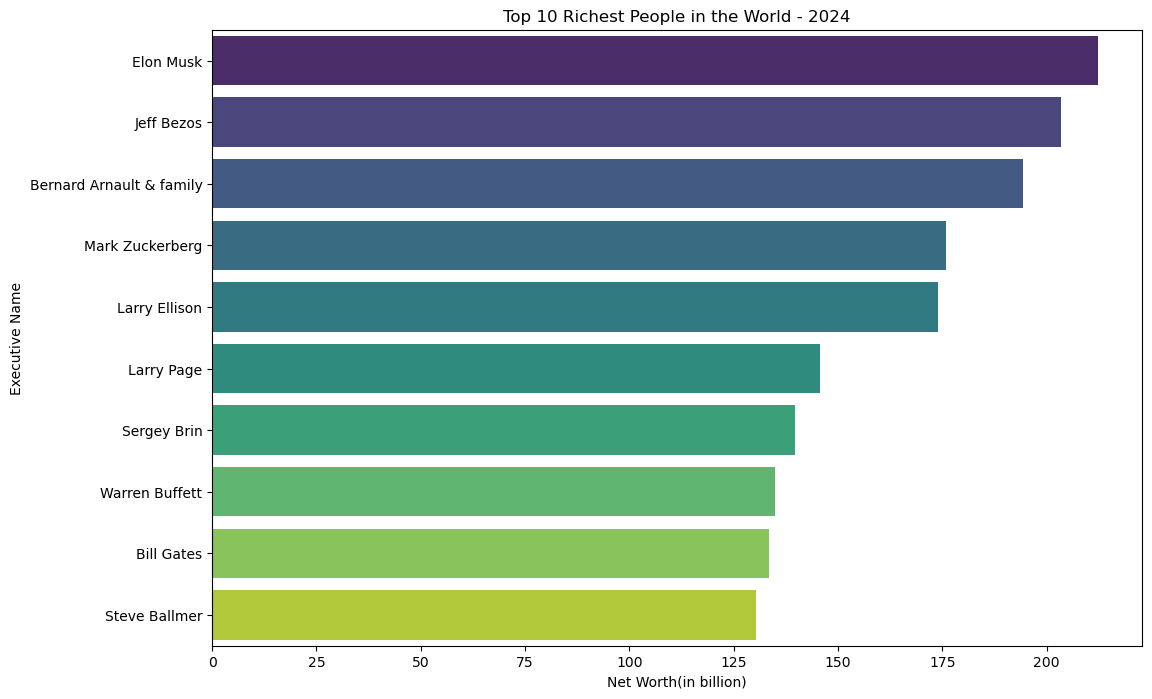

In [16]:
top_10 = df.nlargest(10, "NET WORTH")
plt.figure(figsize=(12,8))
sns.barplot(x="NET WORTH", y="EXECUTIVE NAME", data=top_10, palette="viridis")
plt.title("Top 10 Richest People in the World - 2024")
plt.xlabel("Net Worth(in billion)")
plt.ylabel("Executive Name")
plt.show()

 - This pie chart visualizes the distribution of net worth among the top 10 richest individuals in 2024. Each slice represents the proportion of total wealth held by each billionaire, using a viridis color palette for distinction.

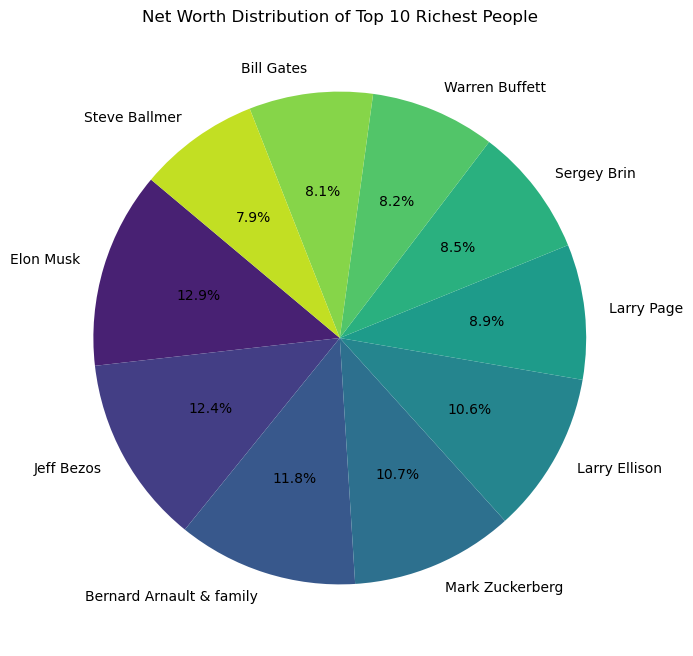

In [17]:
plt.figure(figsize=(8, 8))
plt.pie(top_10['NET WORTH'], labels=top_10['EXECUTIVE NAME'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', 10))
plt.title('Net Worth Distribution of Top 10 Richest People')
plt.show()

## Countplot

 - This plot helps visualize which countries have the highest number of individuals among the richest in our dataset.

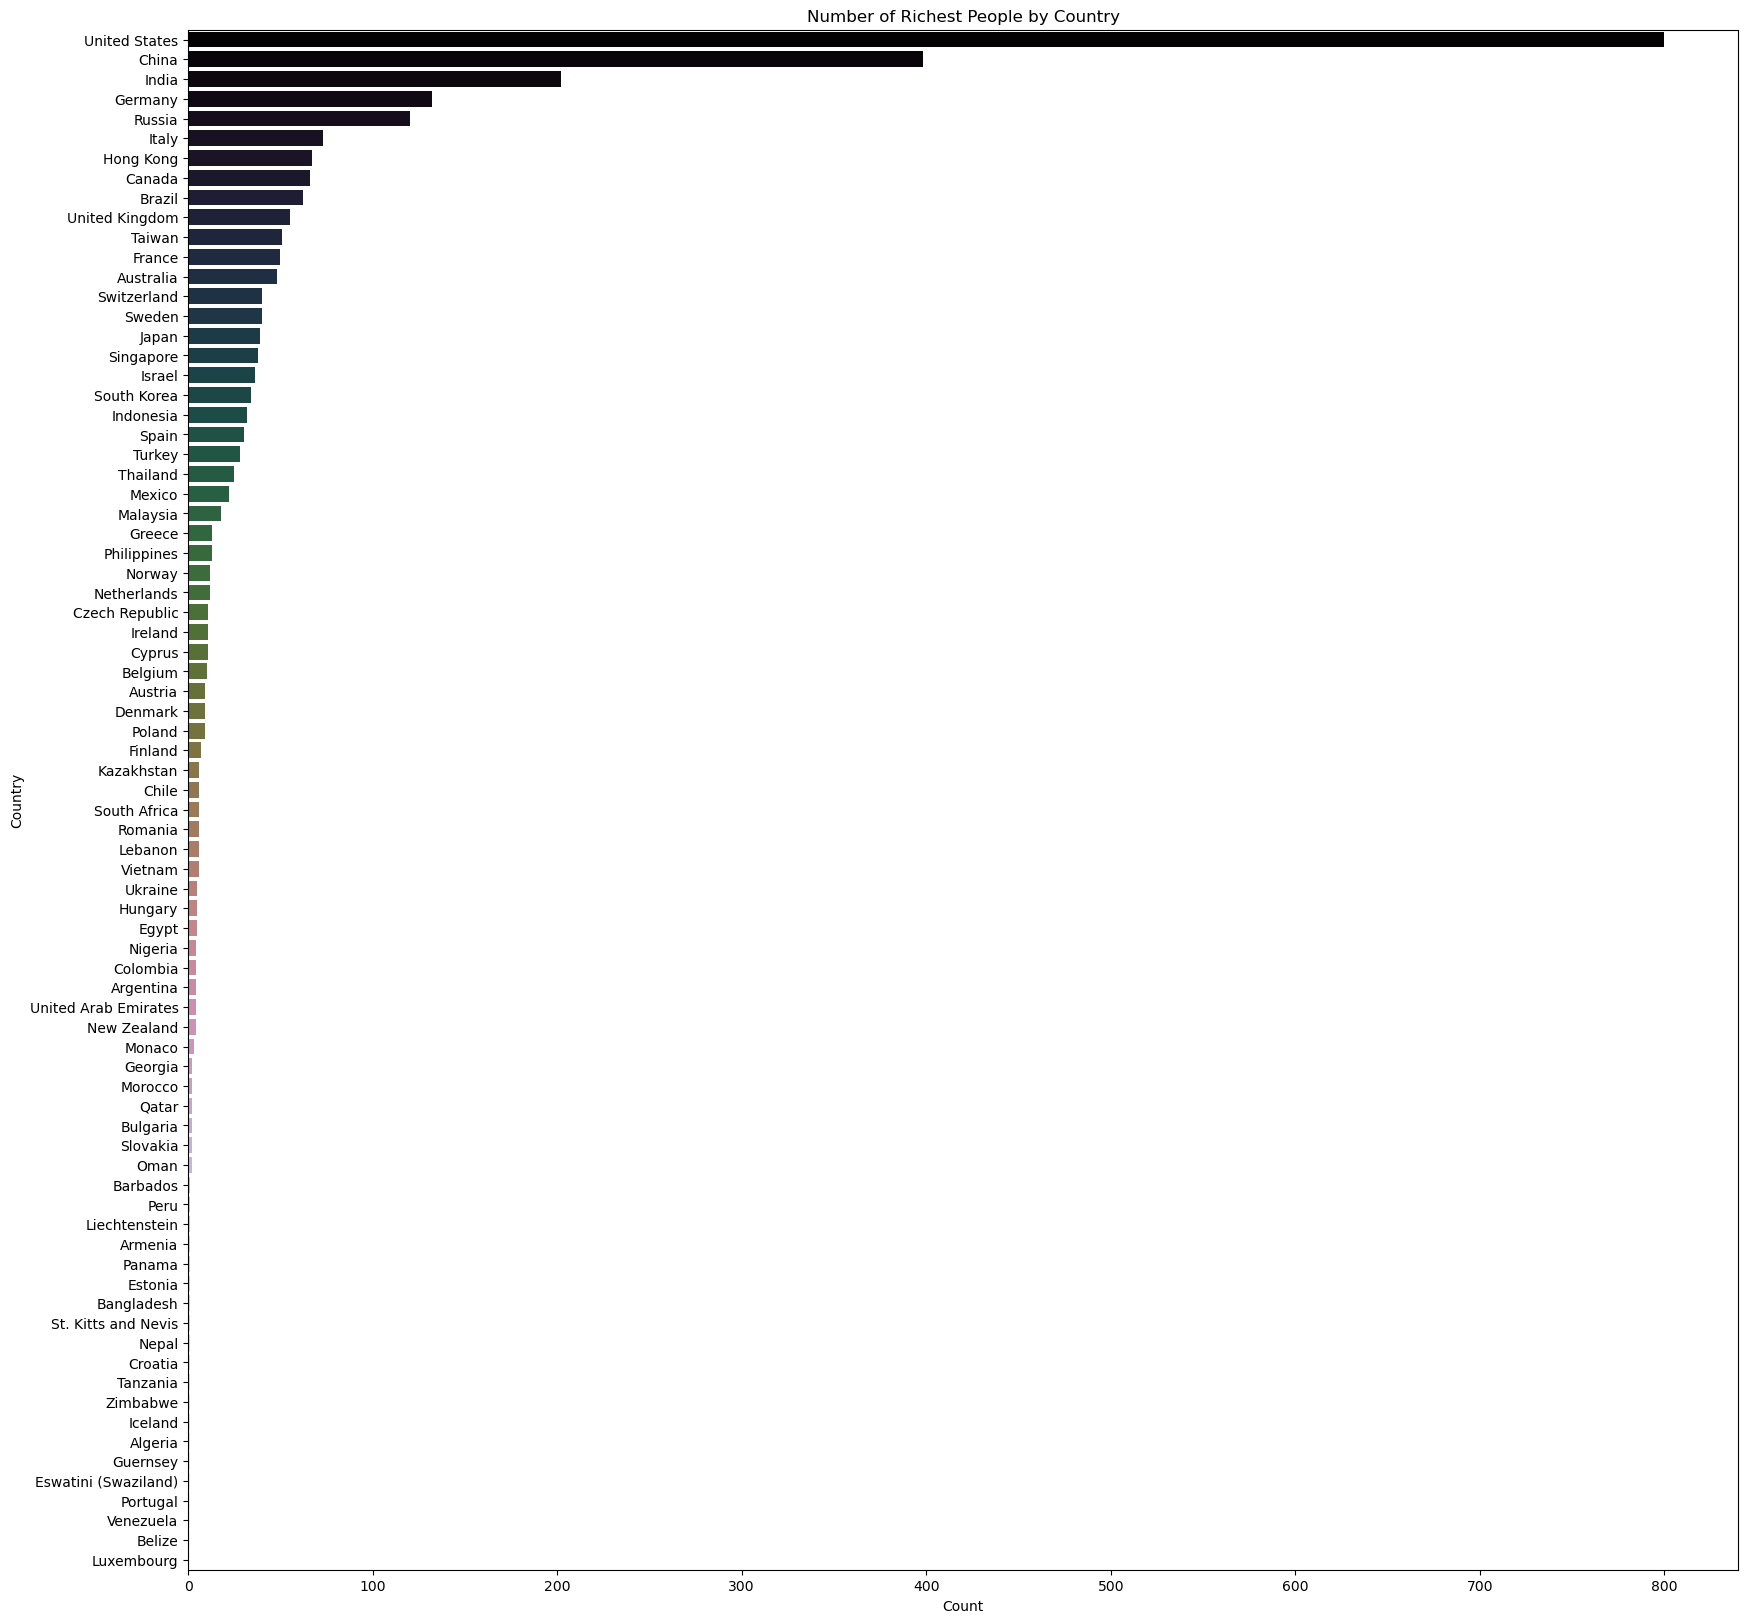

In [18]:
plt.figure(figsize=(20, 20))
sns.countplot(y='COUNTRY', data=df, order=df['COUNTRY'].value_counts().index, palette='cubehelix')
plt.title('Number of Richest People by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

## Violinplot

 - This violinplot plot displays the number of richest individuals grouped by country

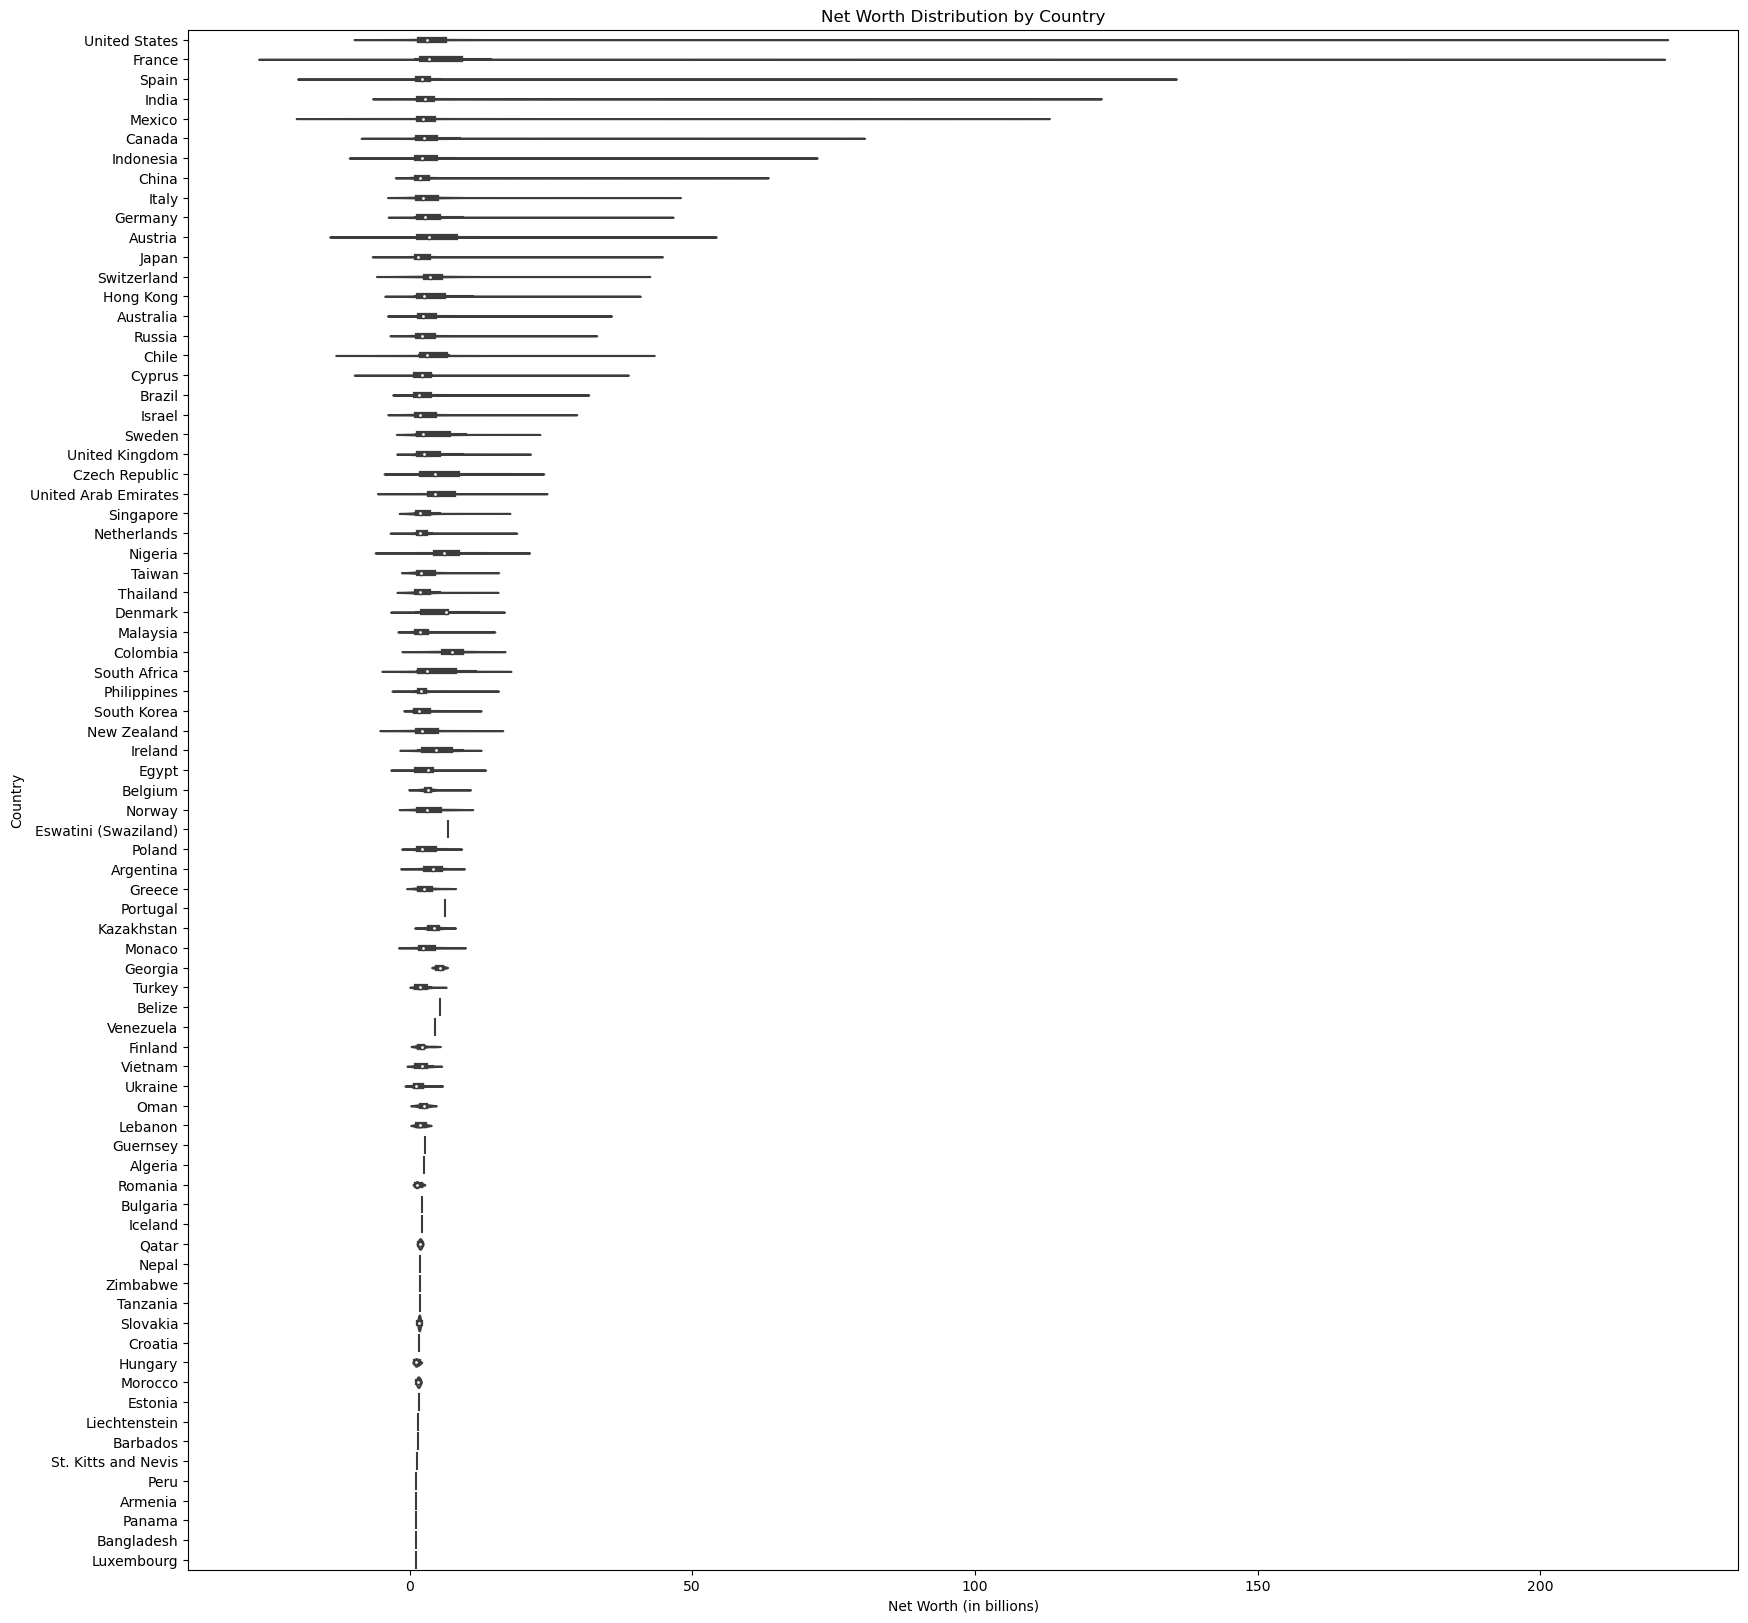

In [19]:
plt.figure(figsize=(20, 20))
sns.violinplot(x='NET WORTH', y='COUNTRY', data=df, palette='muted')
plt.title('Net Worth Distribution by Country')
plt.xlabel('Net Worth (in billions)')
plt.ylabel('Country')
plt.show()

## Histplot

C:\Users\PRATIK KOLHE\anaconda3\envs\pythangama\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


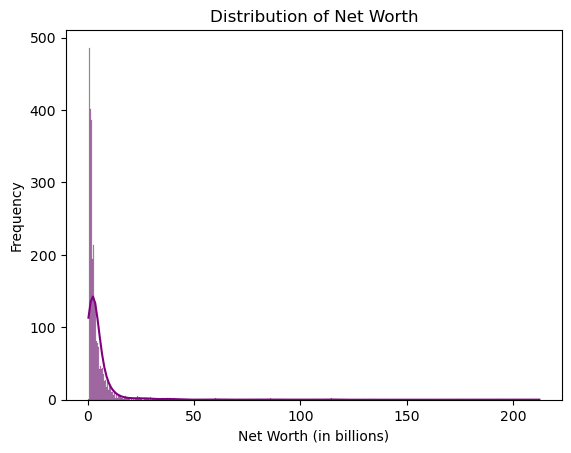

In [20]:
sns.histplot(df['NET WORTH'], kde=True, color='purple')
plt.title('Distribution of Net Worth')
plt.xlabel('Net Worth (in billions)')
plt.ylabel('Frequency')
plt.show()

C:\Users\PRATIK KOLHE\AppData\Local\Temp\ipykernel_17128\1575413614.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='NET WORTH', y='COUNTRY', data=df, jitter=True, palette='pastel')
C:\Users\PRATIK KOLHE\anaconda3\envs\pythangama\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PRATIK KOLHE\anaconda3\envs\pythangama\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PRATIK KOLHE\anaconda3\envs\pythangama\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to ge

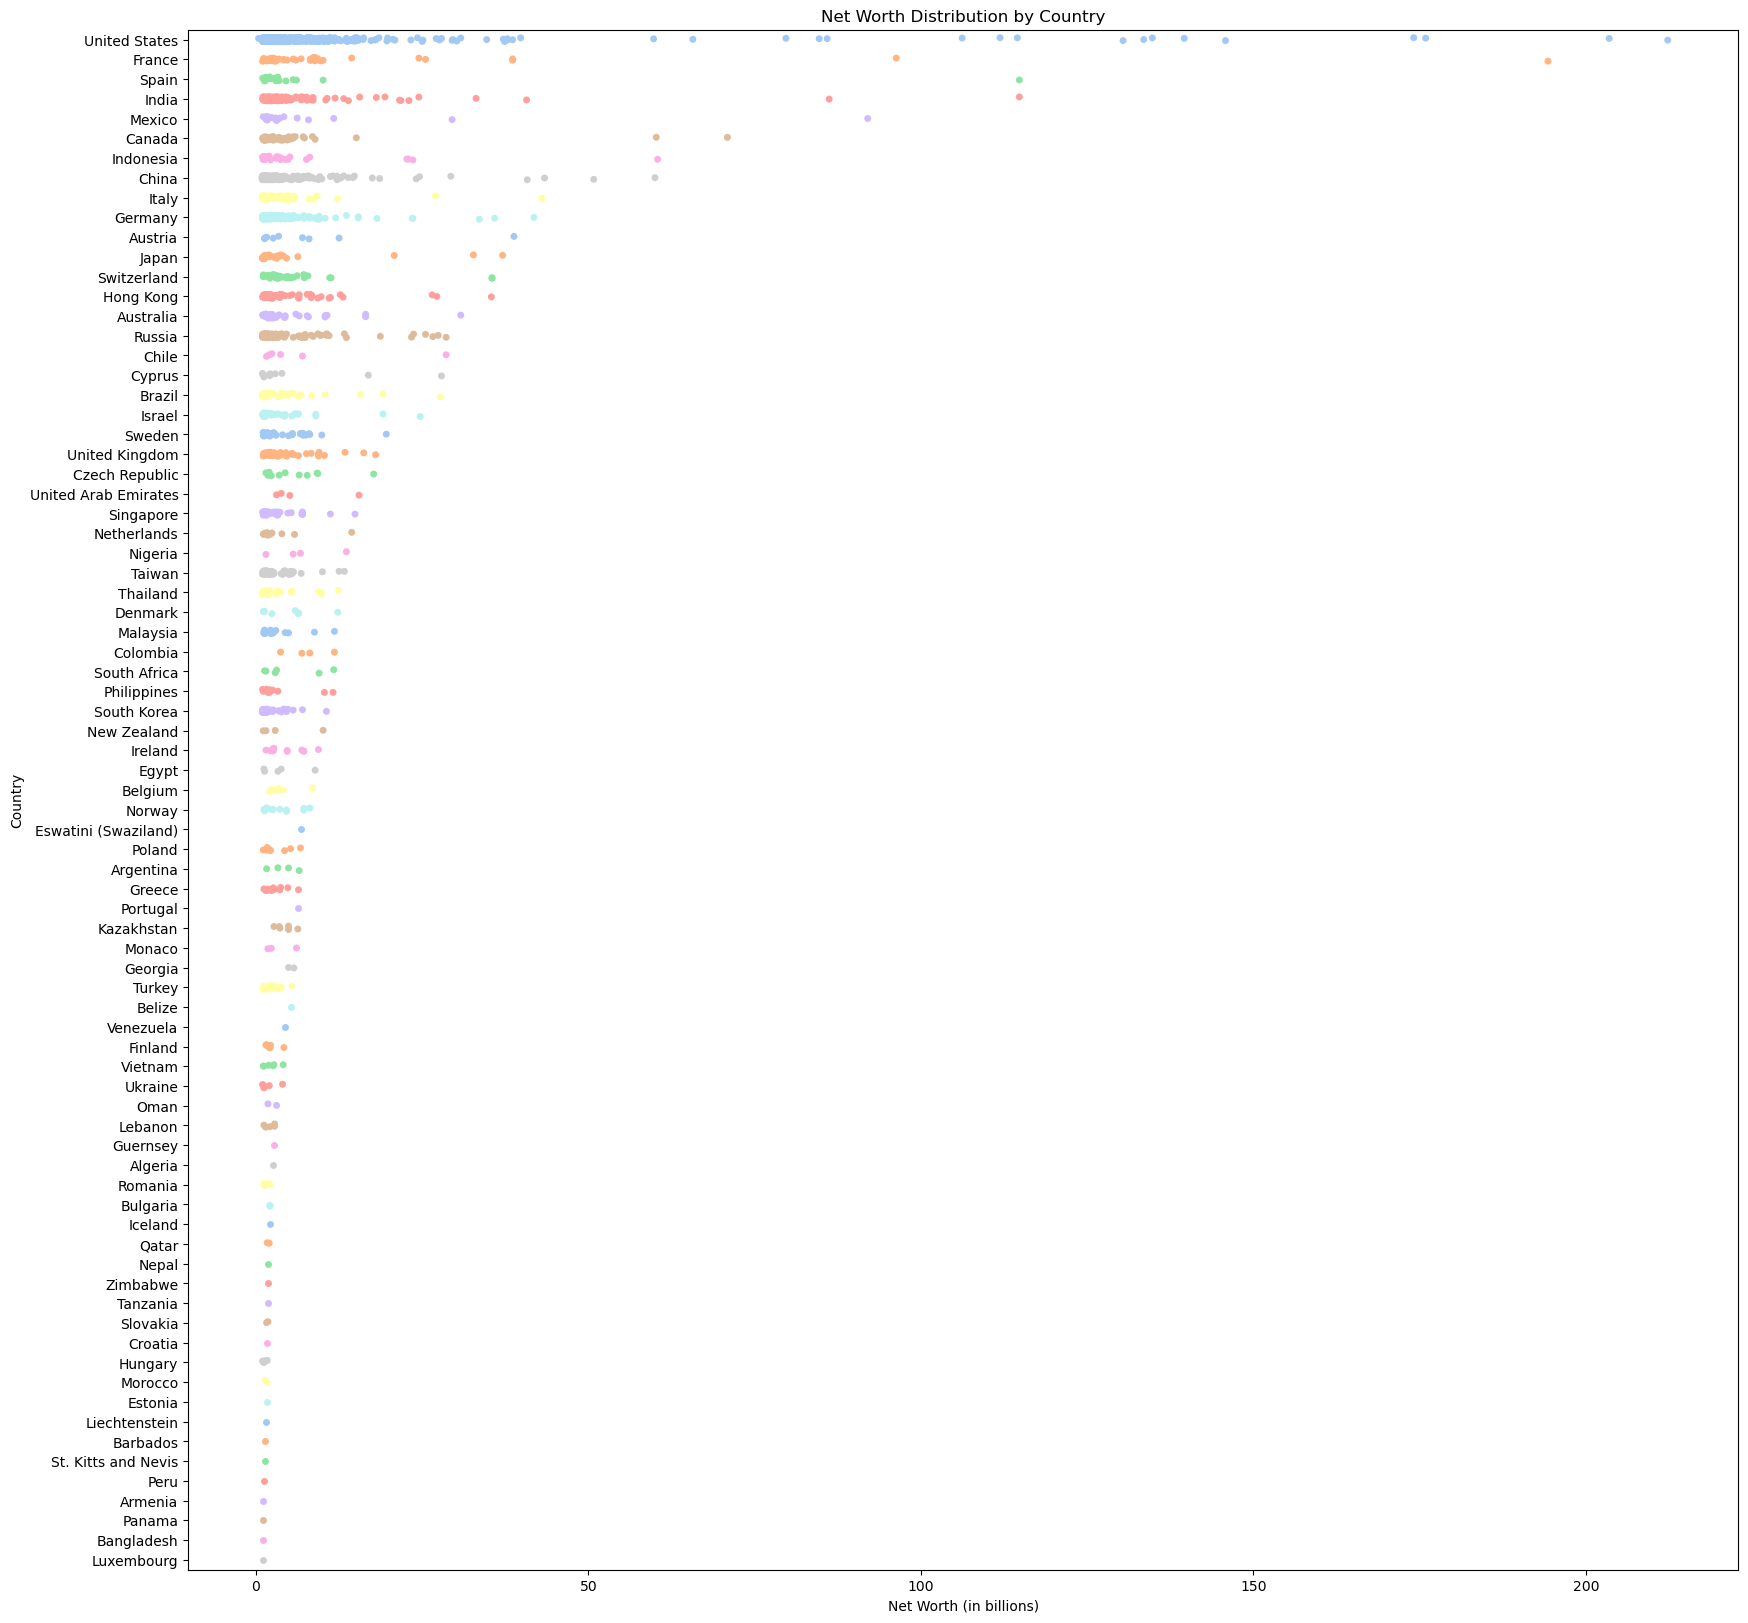

In [21]:
plt.figure(figsize=(20, 20))
sns.stripplot(x='NET WORTH', y='COUNTRY', data=df, jitter=True, palette='pastel')
plt.title('Net Worth Distribution by Country')

plt.xlabel('Net Worth (in billions)')
plt.ylabel('Country')
plt.show()


## Conclusion


 - This analysis provides valuable insights into the net worth of top executives worldwide and their distribution across countries. By examining this dataset, we gain a deeper understanding of global economic dynamics within corporate leadership.